In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
from  sklearn.metrics  import  mean_squared_error  as mse

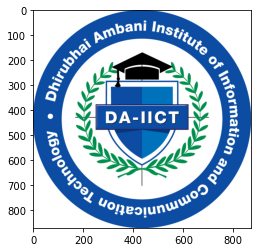

(870, 870, 3)


In [3]:
img = cv2.cvtColor(cv2.imread('da_image.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print(img.shape)

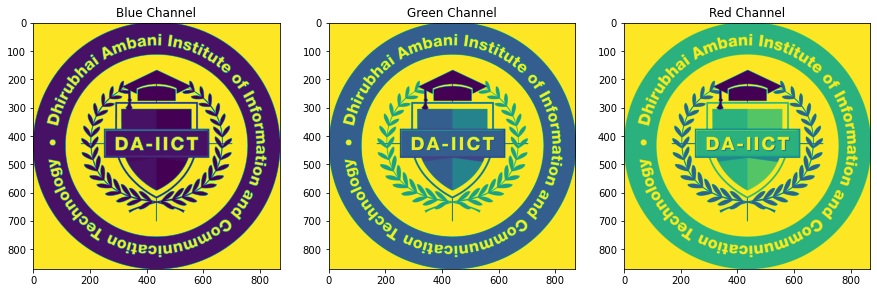

In [4]:
#Splitting into channels
blue,green,red = cv2.split(img)

# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [5]:
# ensuring data is between 0 to 1
df_blue = blue/255
df_green = green/255
df_red = red/255

In [6]:
blue_variance_ratios = []
green_variance_ratios = []
red_variance_ratios = []

# Doing PCA for all 3 channels
for i in range(10,870,10):
  pca_b = PCA(n_components=i)
  pca_b.fit(df_blue)
  pca_g = PCA(n_components=i)
  pca_g.fit(df_green)
  pca_r = PCA(n_components=i)
  pca_r.fit(df_red)
  trans_pca_b = pca_b.transform(df_blue)
  trans_pca_g = pca_b.transform(df_green)
  trans_pca_r = pca_b.transform(df_red)
  blue_variance_ratios.append(sum(pca_b.explained_variance_ratio_))
  green_variance_ratios.append(sum(pca_g.explained_variance_ratio_))
  red_variance_ratios.append(sum(pca_r.explained_variance_ratio_))

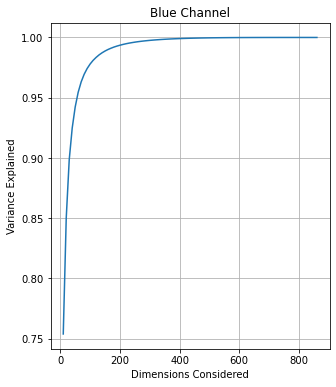

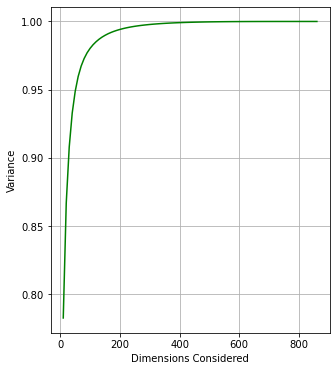

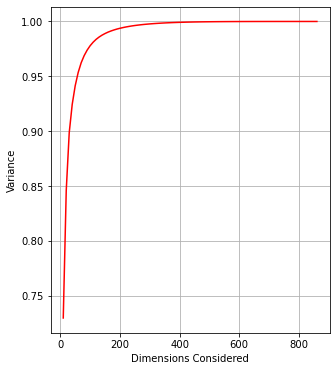

In [55]:
x_line = []
for i in range(10,870,10):
  x_line.append(i)
# plt.plot(x_line,b_variances)
fig = plt.figure(figsize = (5, 6)) 
plt.title("Blue Channel")
plt.xlabel("Dimensions Considered")
plt.ylabel("Variance Explained")
plt.plot(x_line,blue_variance_ratios)
plt.grid()
plt.show()
fig = plt.figure(figsize = (5, 6)) 
plt.xlabel("Dimensions Considered")
plt.ylabel("Variance Explained")
plt.ylabel("Variance")
plt.plot(x_line,green_variance_ratios,color='green')
plt.grid()
plt.show()
fig = plt.figure(figsize = (5, 6)) 
plt.xlabel("Dimensions Considered")
plt.ylabel("Variance Explained")
plt.ylabel("Variance")
plt.plot(x_line,red_variance_ratios,color='red')
plt.grid()
plt.show()

In [44]:
def CompressAndDisplayImage(dimensions):
  pca_b = PCA(n_components=dimensions)
  pca_b.fit(df_blue)
  trans_pca_b = pca_b.transform(df_blue)
  pca_g = PCA(n_components=dimensions)
  pca_g.fit(df_green)
  trans_pca_g = pca_g.transform(df_green)
  pca_r = PCA(n_components=dimensions)
  pca_r.fit(df_red)
  trans_pca_r = pca_r.transform(df_red)

  print(f"Blue Channel Variance: {sum(pca_b.explained_variance_ratio_)}")
  print(f"Green Channel Variance: {sum(pca_g.explained_variance_ratio_)}")
  print(f"Red Channel Variance: {sum(pca_r.explained_variance_ratio_)}")

  b_arr = pca_b.inverse_transform(trans_pca_b)
  g_arr = pca_g.inverse_transform(trans_pca_g)
  r_arr = pca_r.inverse_transform(trans_pca_r)

  img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))

  fig = plt.figure(figsize = (10, 7.2)) 
  #fig.add_subplot(121)
  #plt.title("Original Image")
  #plt.imshow(img)
  fig.add_subplot(122)
  plt.title(f'Post PCA ({dimensions} dimensions)')
  plt.imshow(img_reduced)
  plt.show()
    
  # RMSE
  print(mse(df_blue , b_arr , squared=False))
  print(mse(df_green , g_arr , squared=False))
  print(mse(df_red , r_arr , squared=False))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.9935648226837049
Green Channel Variance: 0.9941616565664149
Red Channel Variance: 0.9937959902748918


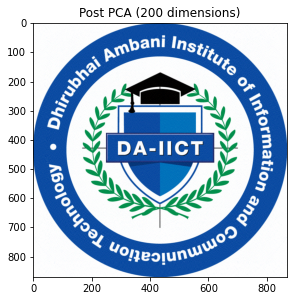

0.03628799070104658
0.025171460512205462
0.0175091265028994


In [45]:
CompressAndDisplayImage(200)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.9779432517901917
Green Channel Variance: 0.9802967864880041
Red Channel Variance: 0.977847744796052


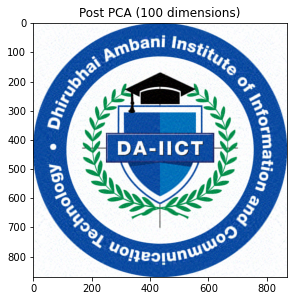

0.0670588181377301
0.046157278873273956
0.03294640724137046


In [46]:
CompressAndDisplayImage(100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.9423032980246341
Green Channel Variance: 0.9487310465998462
Red Channel Variance: 0.9413689828250666


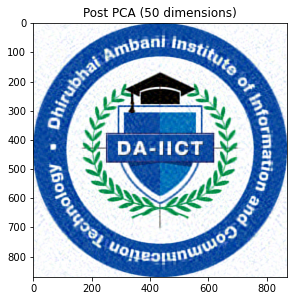

0.10835934101538819
0.07451383636470789
0.05323306621979239


In [47]:
CompressAndDisplayImage(50)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.7538841839537315
Green Channel Variance: 0.7825686583827102
Red Channel Variance: 0.7297300272813159


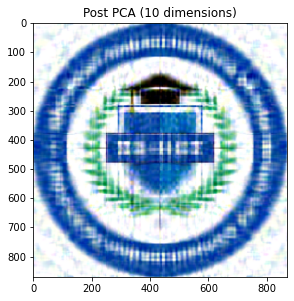

0.22337024018093732
0.15282446891207815
0.11343895031462171


In [48]:
CompressAndDisplayImage(10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.628864418099541
Green Channel Variance: 0.6555120231603824
Red Channel Variance: 0.5761178869817015


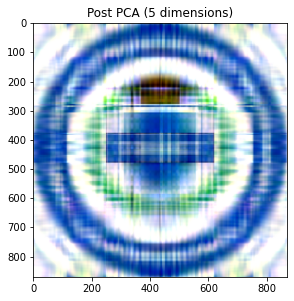

0.2756272089262313
0.19334849728941825
0.14168458679812998


In [49]:
CompressAndDisplayImage(5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Blue Channel Variance: 0.3832129939545568
Green Channel Variance: 0.42068274651318016
Red Channel Variance: 0.33822686728695284


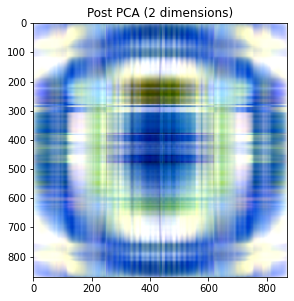

0.35666386847049236
0.2529646395655778
0.1778214097607088


In [50]:
CompressAndDisplayImage(2)